In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

data_dir = pathlib.Path('images/landmark')
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

1584


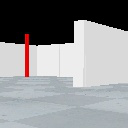

In [3]:
blue = list(data_dir.glob('blue_landmark/*'))
PIL.Image.open(str(blue[0]))

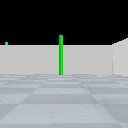

In [4]:
green = list(data_dir.glob('green_landmark/*'))
PIL.Image.open(str(green[0]))

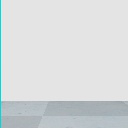

In [5]:
no_lm = list(data_dir.glob('no_landmark/*'))
PIL.Image.open(str(no_lm[0]))

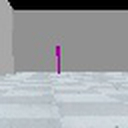

In [6]:
pink = list(data_dir.glob('pink_landmark/*'))
PIL.Image.open(str(pink[0]))

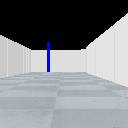

In [7]:
red = list(data_dir.glob('red_landmark/*'))
PIL.Image.open(str(red[0]))

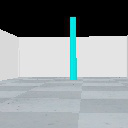

In [8]:
yellow = list(data_dir.glob('yellow_landmark/*'))
PIL.Image.open(str(yellow[0]))

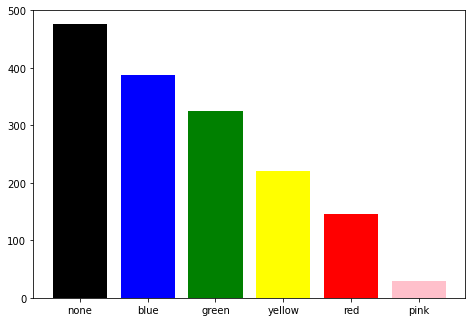

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['none', 'blue', 'green', 'yellow', 'red', 'pink'], sorted([len(blue), len(green), len(no_lm), len(pink), len(red), len(yellow)], reverse=True), color=['black', 'blue', 'green', 'yellow', 'red', 'pink'])
plt.show() 

In [10]:
batch_size = 36
img_height = 128
img_width = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 1584 files belonging to 6 classes.
Using 1268 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1584 files belonging to 6 classes.
Using 316 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['blue_landmark', 'green_landmark', 'no_landmark', 'pink_landmark', 'red_landmark', 'yellow_landmark']


In [28]:
val_class_names = val_ds.class_names
print(val_class_names)

['blue_landmark', 'green_landmark', 'no_landmark', 'pink_landmark', 'red_landmark', 'yellow_landmark']


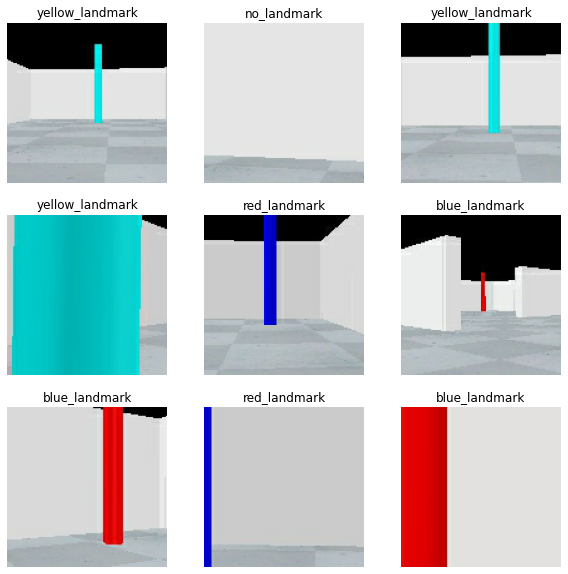

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(36, 128, 128, 3)
(36,)


In [15]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
36/36 [==============================] - 14s 385ms/step - loss: 0.9345 - accuracy: 0.6491 - val_loss: 0.3399 - val_accuracy: 0.8987
Epoch 2/10
36/36 [==============================] - 14s 381ms/step - loss: 0.1637 - accuracy: 0.9503 - val_loss: 0.0930 - val_accuracy: 0.9810
Epoch 3/10
36/36 [==============================] - 13s 369ms/step - loss: 0.0414 - accuracy: 0.9921 - val_loss: 0.0711 - val_accuracy: 0.9873
Epoch 4/10
36/36 [==============================] - 14s 378ms/step - loss: 0.0376 - accuracy: 0.9945 - val_loss: 0.0803 - val_accuracy: 0.9905
Epoch 5/10
36/36 [==============================] - 14s 380ms/step - loss: 0.0387 - accuracy: 0.9913 - val_loss: 0.0765 - val_accuracy: 0.9842
Epoch 6/10
36/36 [==============================] - 14s 375ms/step - loss: 0.0146 - accuracy: 0.9968 - val_loss: 0.0706 - val_accuracy: 0.9905
Epoch 7/10
36/36 [==============================] - 14s 381ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0772 - val_accuracy: 0.9905

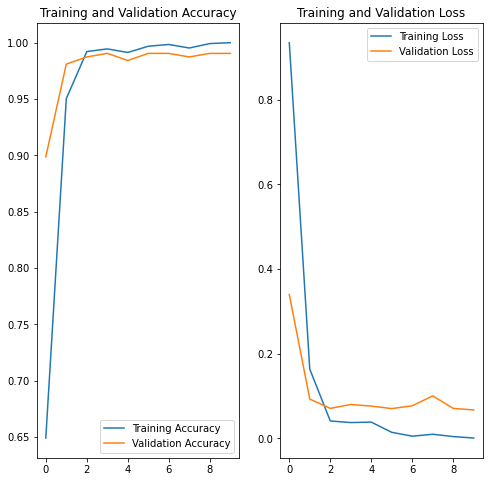

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [20]:
loss, accuracy = model.evaluate(val_ds, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.99


In [24]:
classes = model.predict_classes(val_ds)
print(classes.ravel())

[0 1 0 0 0 0 1 2 2 5 2 5 0 2 2 4 2 1 5 2 0 2 1 1 2 1 0 3 5 0 1 1 4 5 4 5 0
 0 0 0 1 2 0 5 1 2 0 4 1 5 1 1 2 1 5 2 2 2 1 2 5 1 2 3 1 2 2 1 5 1 0 3 2 2
 2 5 2 5 2 5 0 1 5 0 2 1 1 2 0 2 1 2 0 0 0 5 2 1 1 5 5 0 4 2 0 0 2 2 5 1 0
 2 2 2 2 1 1 4 1 2 2 0 1 0 1 1 0 1 2 2 0 1 1 2 5 2 5 0 2 5 0 1 2 0 0 2 1 2
 1 2 2 2 1 2 1 4 2 2 5 1 5 4 0 5 5 1 1 5 5 5 1 4 0 0 0 0 0 5 1 1 4 3 2 2 4
 5 2 0 4 1 2 2 2 5 1 0 4 4 2 2 1 0 1 1 2 4 4 1 0 5 1 0 1 2 2 0 2 2 0 2 2 5
 0 1 5 2 2 0 2 2 2 0 5 2 5 4 4 1 1 2 0 4 5 1 0 2 5 1 5 2 2 1 1 5 4 1 0 1 0
 1 3 5 0 2 1 1 2 5 2 1 0 2 1 4 0 4 1 4 0 0 4 2 2 2 1 1 0 0 2 1 2 4 0 0 5 1
 2 2 0 2 0 1 0 0 4 2 4 2 2 2 2 5 4 1 5 5]


<AxesSubplot:xlabel='Predicted', ylabel='Expected'>

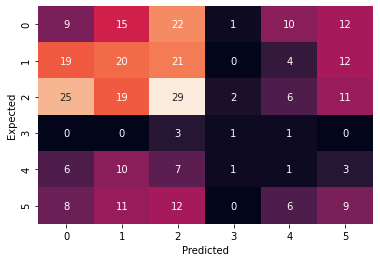

In [22]:
confusion_matrix =  pd.crosstab(index=, columns=classes.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)